In [1]:
import pandas as pd

In [2]:
# reading csv
df=pd.read_csv('heart_2022_with_nans.csv')

In [3]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [4]:
df.shape

(445132, 40)

# Data preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [6]:
#Checking for null values
df.isnull().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

- There are many null values, so removing them may impact the analysis process.
- Instead of removing them we will use simple imputer to handle the missing values.
- Simple imputer is used to handle missing values in a dataset by replacing them with a specified strategy. 

In [7]:
# Separating numerical and categorical columns
numerical_columns = df.select_dtypes(include=['float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [8]:

# Creating new DataFrames for numerical and categorical columns
df_numerical = df[numerical_columns]
df_categorical = df[categorical_columns]


## handling Missing values

## Imputation

In [9]:
from sklearn.impute import SimpleImputer
# Handling missing values for numerical columns
numerical_imputer = SimpleImputer(strategy='mean')
df_numerical_cleaned = pd.DataFrame(numerical_imputer.fit_transform(df_numerical), columns=numerical_columns)

- We used mean to impute missing values in numerical columns.

In [10]:
# Handling missing values for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_categorical_cleaned = pd.DataFrame(categorical_imputer.fit_transform(df_categorical), columns=categorical_columns)

- We used most frequent data to impute missing values in categorical columns.

In [11]:
df_numerical_cleaned.isnull().sum()

PhysicalHealthDays    0
MentalHealthDays      0
SleepHours            0
HeightInMeters        0
WeightInKilograms     0
BMI                   0
dtype: int64

In [12]:
df_categorical_cleaned.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
LastCheckupTime              0
PhysicalActivities           0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
TetanusLast10Tdap            0
HighRisk

In [13]:
# Concatenating the cleaned numerical and categorical DataFrames
df_cleaned = pd.concat([df_numerical_cleaned, df_categorical_cleaned], axis=1)

In [14]:
df_cleaned

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,State,Sex,GeneralHealth,LastCheckupTime,...,ChestScan,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0.0,0.0,8.0,1.702691,83.07447,28.529842,Alabama,Female,Very good,Within past year (anytime less than 12 months ...,...,No,"White only, Non-Hispanic",Age 80 or older,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,0.0,0.0,6.0,1.600000,68.04000,26.570000,Alabama,Female,Excellent,Within past year (anytime less than 12 months ...,...,No,"White only, Non-Hispanic",Age 80 or older,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,2.0,3.0,5.0,1.570000,63.50000,25.610000,Alabama,Female,Very good,Within past year (anytime less than 12 months ...,...,No,"White only, Non-Hispanic",Age 55 to 59,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
3,0.0,0.0,7.0,1.650000,63.50000,23.300000,Alabama,Female,Excellent,Within past year (anytime less than 12 months ...,...,Yes,"White only, Non-Hispanic",Age 65 to 69,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,2.0,0.0,9.0,1.570000,53.98000,21.770000,Alabama,Female,Fair,Within past year (anytime less than 12 months ...,...,Yes,"White only, Non-Hispanic",Age 40 to 44,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,0.0,3.0,6.0,1.650000,69.85000,25.630000,Virgin Islands,Female,Good,Within past 2 years (1 year but less than 2 ye...,...,Yes,"Black only, Non-Hispanic",Age 18 to 24,Yes,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,2.0,2.0,7.0,1.700000,83.01000,28.660000,Virgin Islands,Female,Excellent,Within past year (anytime less than 12 months ...,...,No,"Black only, Non-Hispanic",Age 50 to 54,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,30.0,30.0,5.0,1.700000,49.90000,17.230000,Virgin Islands,Female,Poor,5 or more years ago,...,No,"White only, Non-Hispanic",Age 65 to 69,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,0.0,0.0,5.0,1.830000,108.86000,32.550000,Virgin Islands,Male,Very good,Within past year (anytime less than 12 months ...,...,Yes,"Black only, Non-Hispanic",Age 70 to 74,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [15]:
df_cleaned.isnull().sum()

PhysicalHealthDays           0
MentalHealthDays             0
SleepHours                   0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
State                        0
Sex                          0
GeneralHealth                0
LastCheckupTime              0
PhysicalActivities           0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCateg

# Duplicate Values

In [16]:
df_cleaned.duplicated().sum()

305

In [17]:
# dropping duplicates
df_cleaned=df_cleaned.drop_duplicates()

# EDA

In [18]:
import matplotlib.pyplot as plt

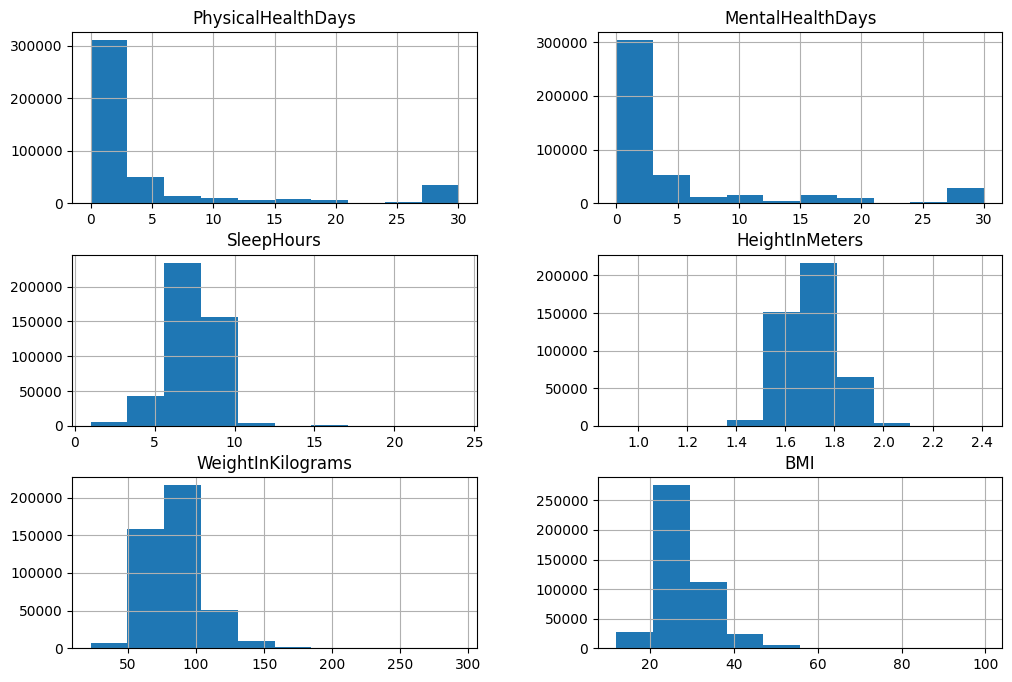

In [19]:
df_cleaned.hist(bins=10, figsize=(12, 8))
plt.show()

- The histogram shows that the individuals experienced fluctuations in their health data, such as increasing or decreasing physical health days, sleep hours, or weight.
- There were also some instances where the individual's mental health days and height in meters were higher or lower compared to their baseline.


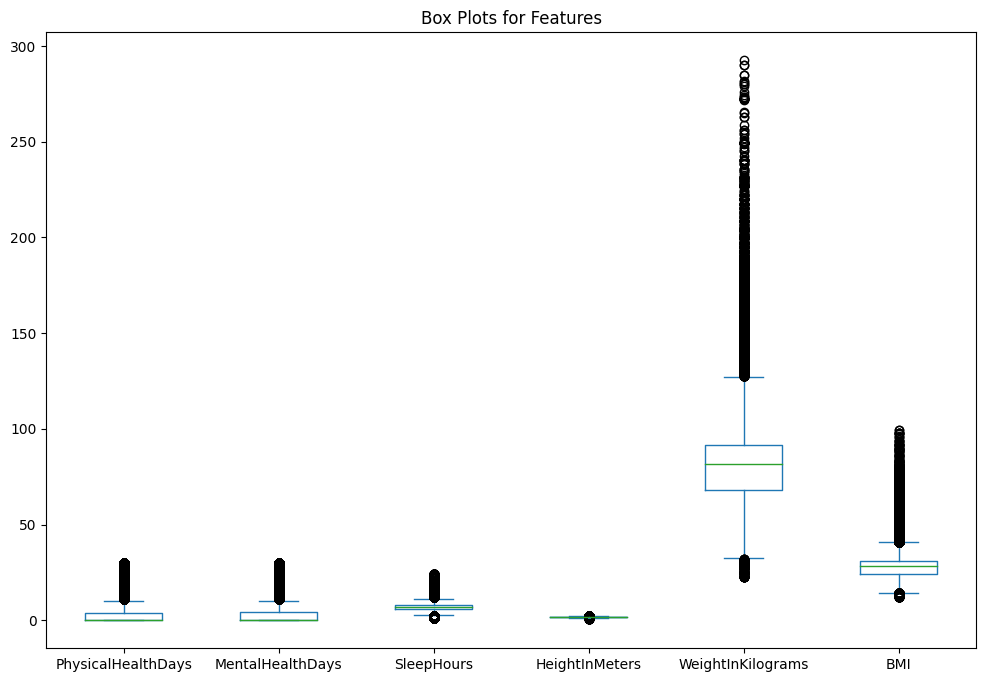

In [20]:
df_cleaned.plot(kind='box', figsize=(12, 8))
plt.title('Box Plots for Features')
plt.show()

- The above is the box plot of all the numerical columns.
- It shows that there are outliers in weight and BMI.

In [21]:
# checking average, maximum and minimum weight.
print("Average Weight",df['WeightInKilograms'].mean())
print("Max Weight",df['WeightInKilograms'].max())
print("Min Weight",df['WeightInKilograms'].min())

Average Weight 83.07447039354527
Max Weight 292.57
Min Weight 22.68


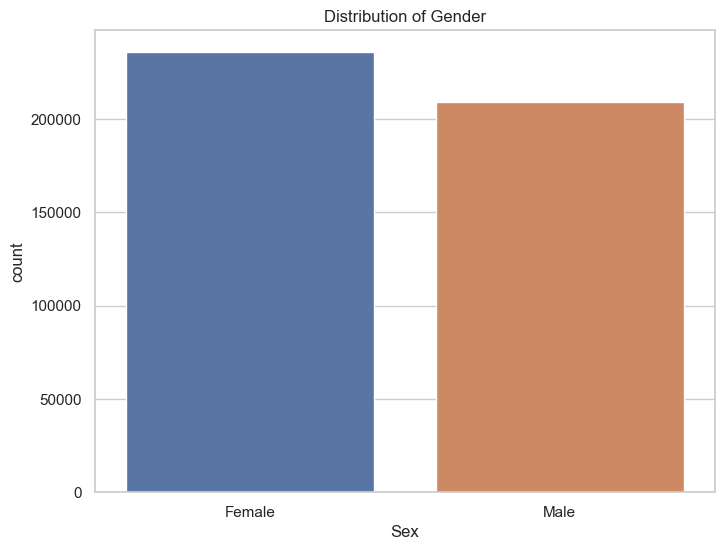

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Countplot for 'Sex'
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=df_cleaned)
plt.title('Distribution of Gender')
plt.show()

- The above barchartshows the distribution of gender.
- There are more number of felmales than male.

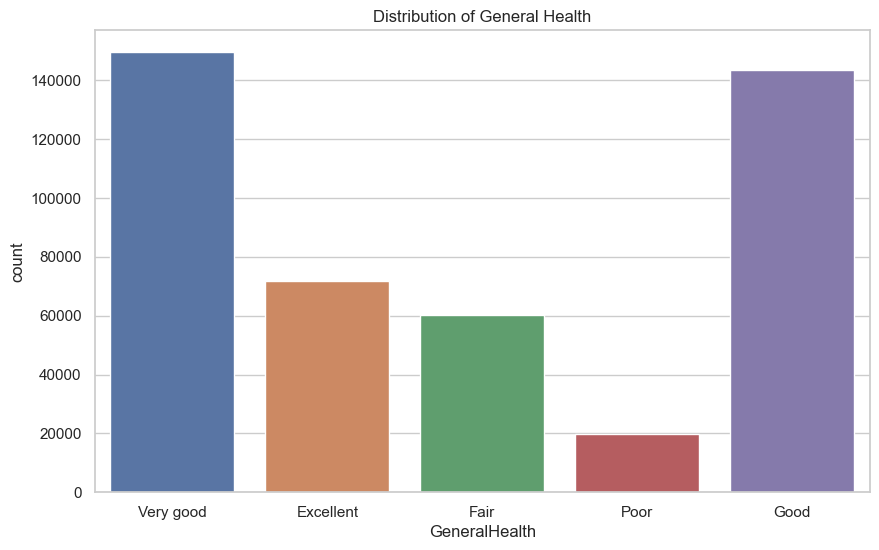

In [23]:
# Bar plot for 'GeneralHealth'
plt.figure(figsize=(10, 6))
sns.countplot(x='GeneralHealth', data=df_cleaned)
plt.title('Distribution of General Health')
plt.show()



- The above barchart shows the general health of people in the dataset.
- Most of the people have very good and good health.
- There are very low people with poor health which is about 20,000.

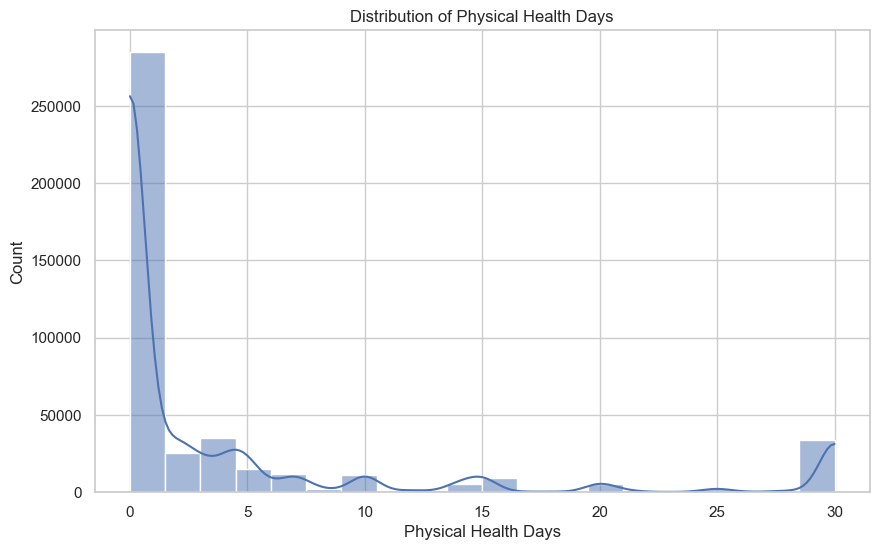

In [24]:
## # Distribution plot for 'PhysicalHealthDays'
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['PhysicalHealthDays'].dropna(), kde=True, bins=20)
plt.title('Distribution of Physical Health Days')
plt.xlabel('Physical Health Days')
plt.show()


- The above histogram shows the distribution of Physical health Days.
- Most people had 0 health days.
- There were less than 5000 people with 30 health days.

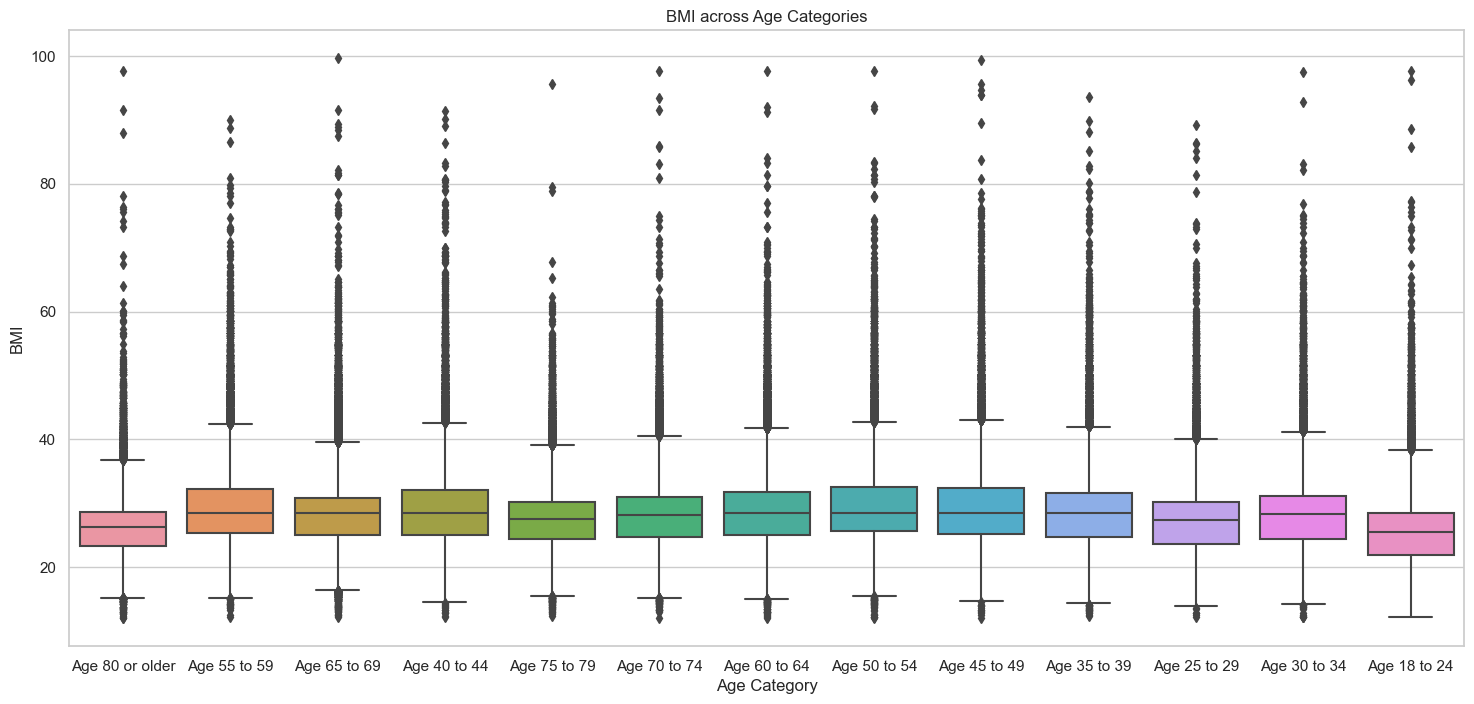

In [25]:

# Boxplot for 'AgeCategory' vs 'BMI'
plt.figure(figsize=(18, 8))
sns.boxplot(x='AgeCategory', y='BMI', data=df_cleaned)
plt.title('BMI across Age Categories')
plt.xlabel('Age Category')
plt.ylabel('BMI')
plt.show()

- The above box plot shows the BMI of different age categories.
- People between age 35 to 39 and 45 to 49 had the heighest BMI.
- There are some people with very high BMI accorss all age categories which can be called outliers, we are not removing them.

C:\Users\Dell\AppData\Local\Temp\ipykernel_9052\3565698772.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


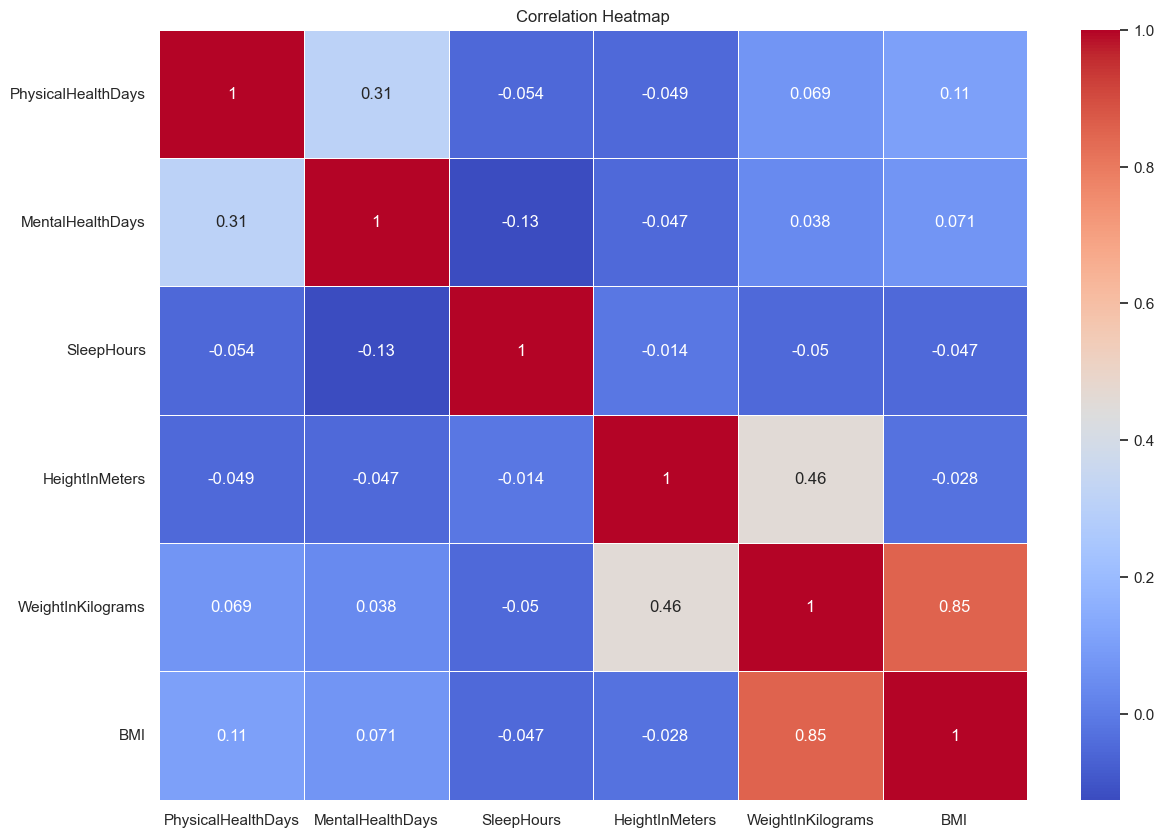

In [26]:

# Heatmap for correlation between numerical features
plt.figure(figsize=(14, 10))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- The above heatmap shows the correaltion between different numerical variables.

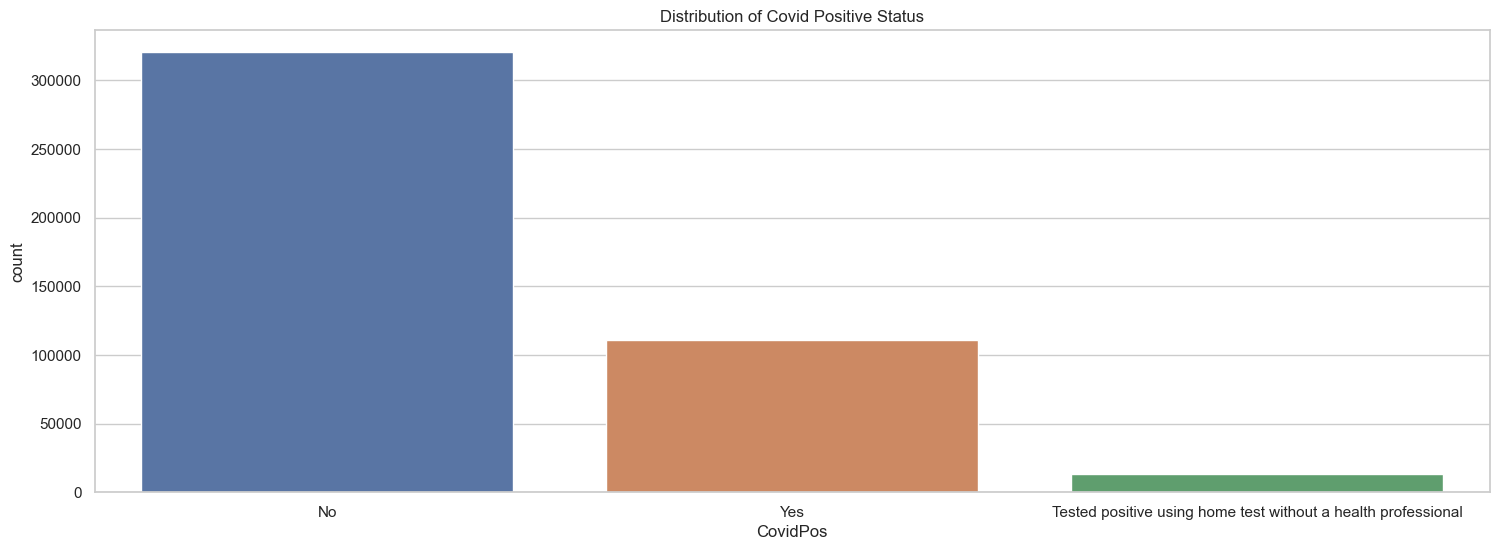

In [27]:

# Countplot for 'CovidPos'
plt.figure(figsize=(18, 6))
sns.countplot(x='CovidPos', data=df_cleaned)
plt.title('Distribution of Covid Positive Status')
plt.show()

- The above barchart shows the people distribution of COVID.
- There were about 11000 peoplo who were tested positive and less than 5000 peole tested posttive using home test.
- More than 300000 people werenot infected by covid.

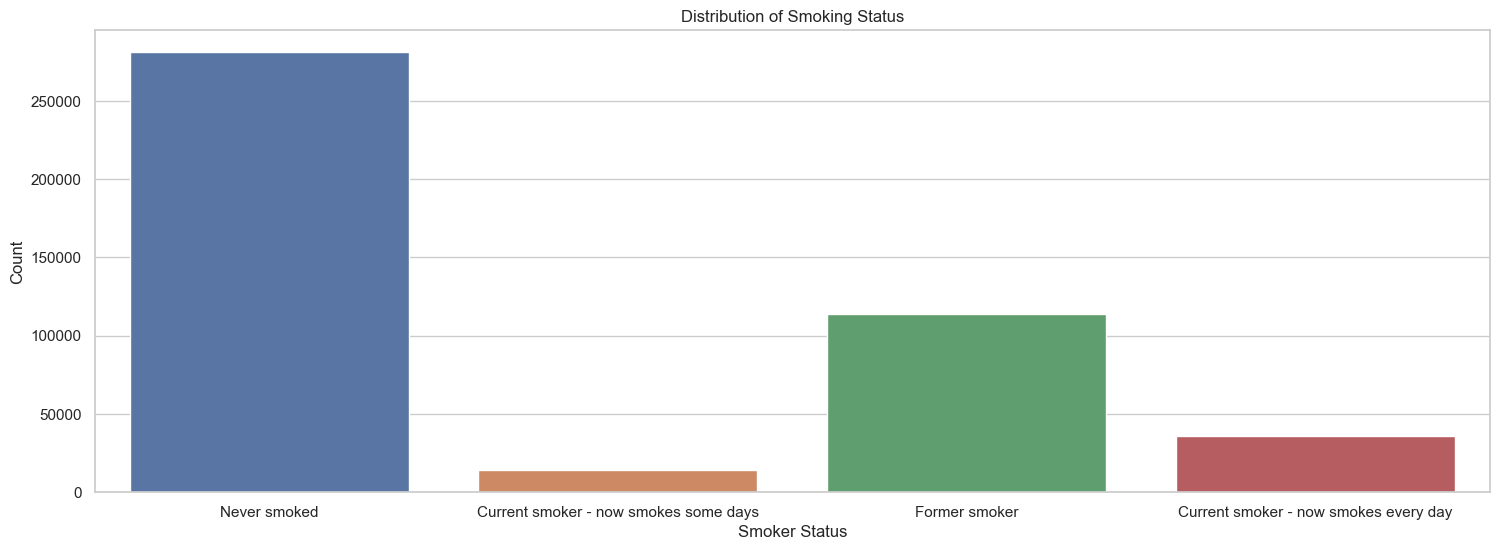

In [28]:
# Countplot for 'SmokerStatus'
plt.figure(figsize=(18, 6))
sns.countplot(x='SmokerStatus', data=df_cleaned)
plt.title('Distribution of Smoking Status')
plt.xlabel('Smoker Status')
plt.ylabel('Count')
plt.show()


- Most people have never smoked which is more than 250000.
- About 110000 people were former smoker.
- Less than 5000 people are current smoker.

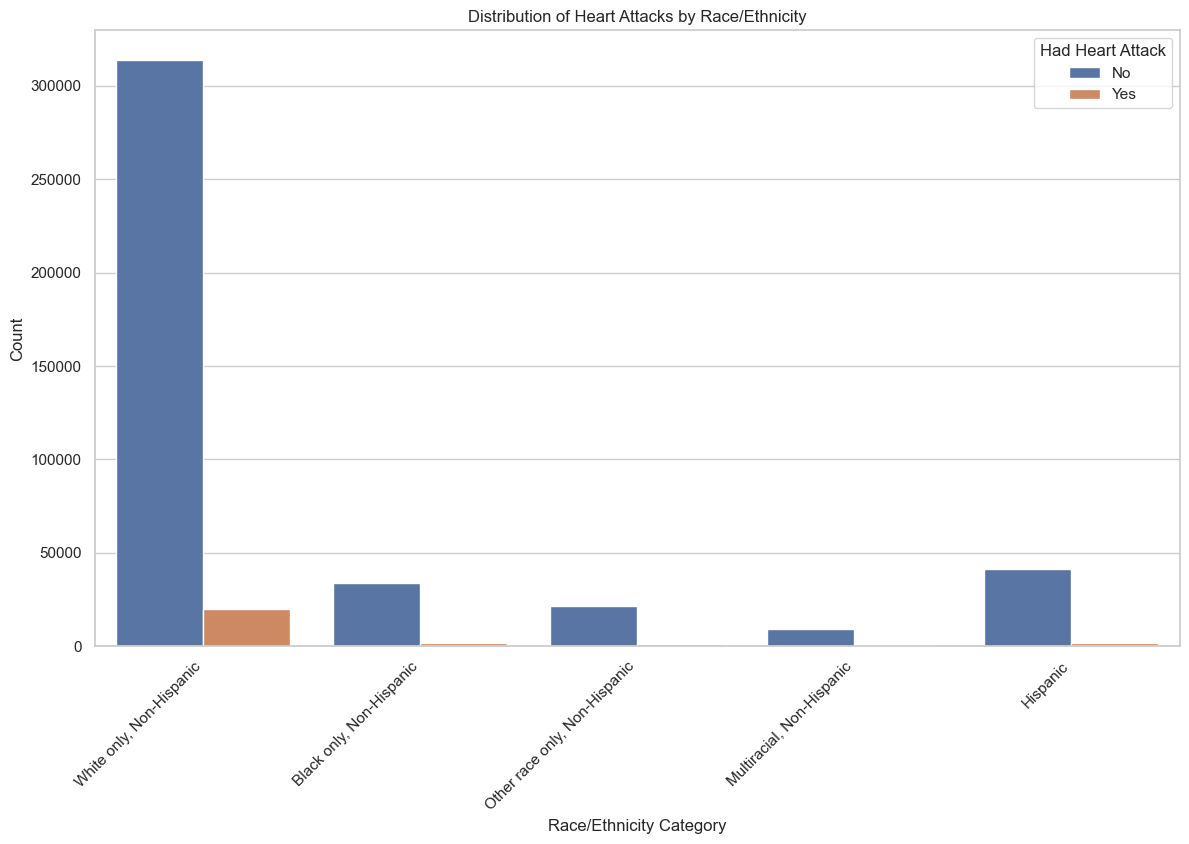

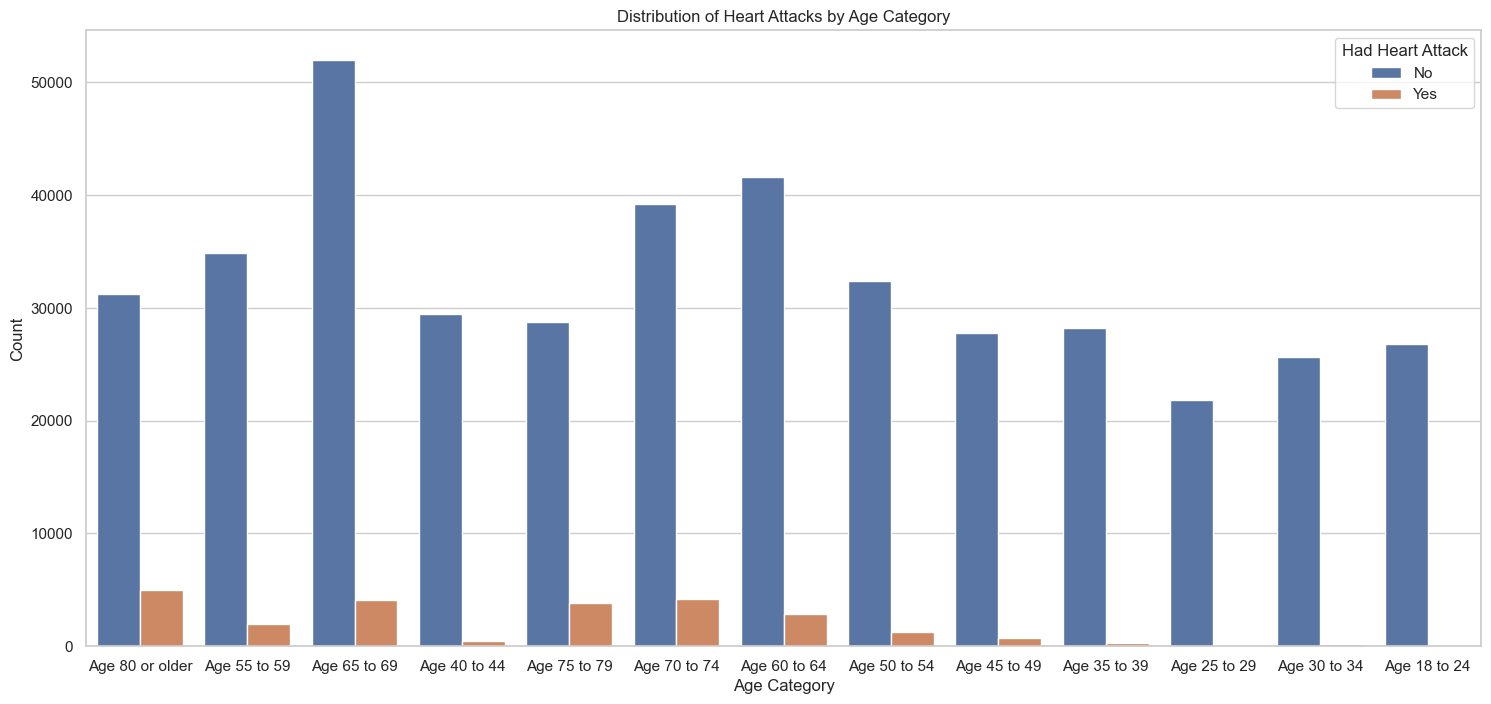

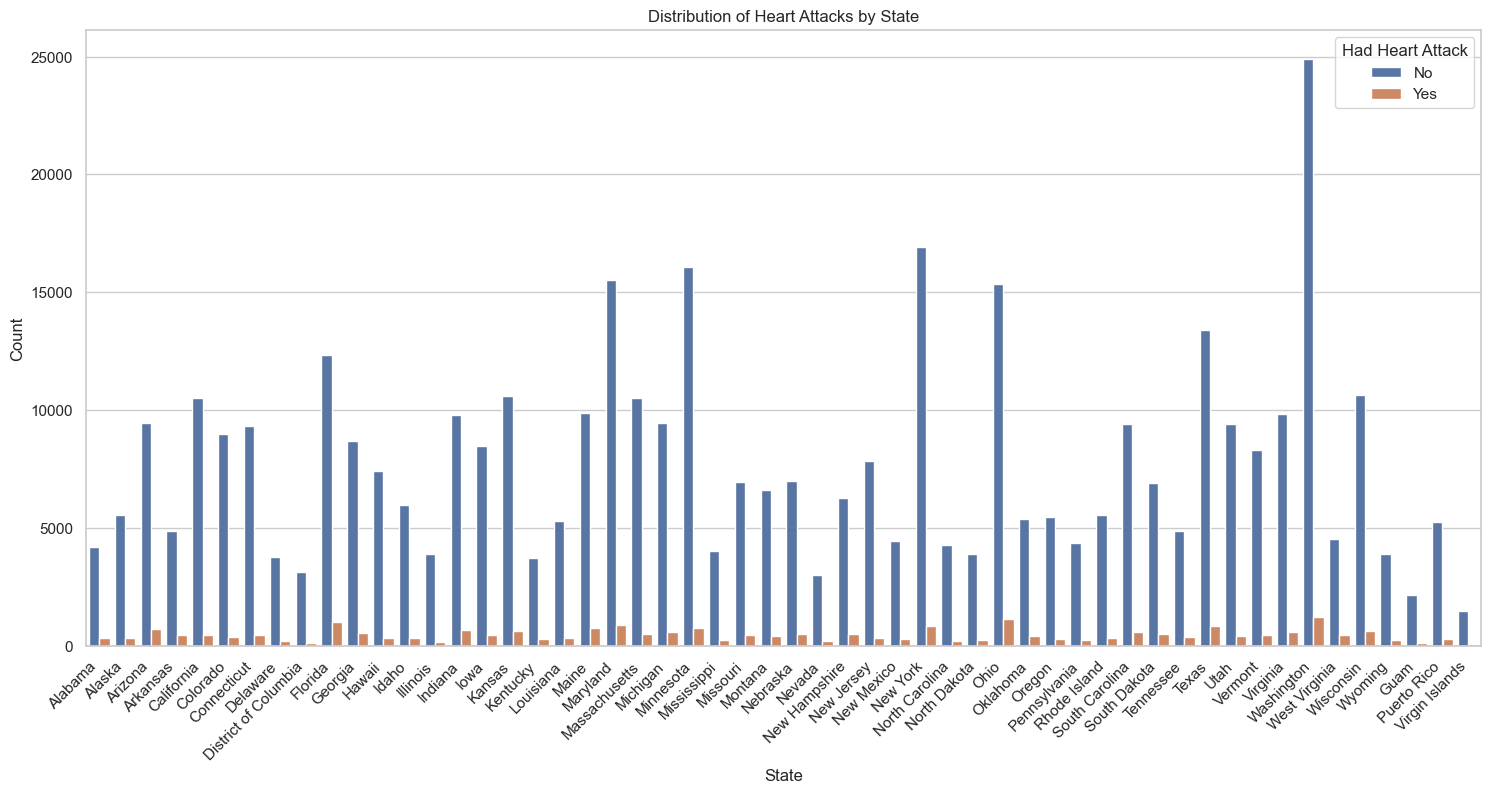

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for 'HadHeartAttack' based on 'RaceEthnicityCategory'
plt.figure(figsize=(14, 8))
sns.countplot(x='RaceEthnicityCategory', hue='HadHeartAttack', data=df_cleaned)
plt.title('Distribution of Heart Attacks by Race/Ethnicity')
plt.xlabel('Race/Ethnicity Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Had Heart Attack')
plt.show()

# Countplot for 'HadHeartAttack' based on 'AgeCategory'
plt.figure(figsize=(18, 8))
sns.countplot(x='AgeCategory', hue='HadHeartAttack', data=df_cleaned)
plt.title('Distribution of Heart Attacks by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Had Heart Attack')
plt.show()

# Countplot for 'HadHeartAttack' based on 'State'
plt.figure(figsize=(18, 8))
sns.countplot(x='State', hue='HadHeartAttack', data=df_cleaned)
plt.title('Distribution of Heart Attacks by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Had Heart Attack')
plt.show()

- There are three different visualization which shows distribution of heartattacks by Age, State and Race.
- In the dataset there we no heart attack in the age group 18 to 24, 30 to 34 and 25 to 29.
- Heighest heart attack was in the age gropu 80 or older and second heighest were in the age group 65 to 69, 75 to 79 and 70 to 74.
- White people had the heighest heart attack.
- The dataset had more data of white people and least daata of multiracial people.

In [30]:
df_cleaned

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,State,Sex,GeneralHealth,LastCheckupTime,...,ChestScan,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0.0,0.0,8.0,1.702691,83.07447,28.529842,Alabama,Female,Very good,Within past year (anytime less than 12 months ...,...,No,"White only, Non-Hispanic",Age 80 or older,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,0.0,0.0,6.0,1.600000,68.04000,26.570000,Alabama,Female,Excellent,Within past year (anytime less than 12 months ...,...,No,"White only, Non-Hispanic",Age 80 or older,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,2.0,3.0,5.0,1.570000,63.50000,25.610000,Alabama,Female,Very good,Within past year (anytime less than 12 months ...,...,No,"White only, Non-Hispanic",Age 55 to 59,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
3,0.0,0.0,7.0,1.650000,63.50000,23.300000,Alabama,Female,Excellent,Within past year (anytime less than 12 months ...,...,Yes,"White only, Non-Hispanic",Age 65 to 69,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,2.0,0.0,9.0,1.570000,53.98000,21.770000,Alabama,Female,Fair,Within past year (anytime less than 12 months ...,...,Yes,"White only, Non-Hispanic",Age 40 to 44,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,0.0,3.0,6.0,1.650000,69.85000,25.630000,Virgin Islands,Female,Good,Within past 2 years (1 year but less than 2 ye...,...,Yes,"Black only, Non-Hispanic",Age 18 to 24,Yes,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,2.0,2.0,7.0,1.700000,83.01000,28.660000,Virgin Islands,Female,Excellent,Within past year (anytime less than 12 months ...,...,No,"Black only, Non-Hispanic",Age 50 to 54,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,30.0,30.0,5.0,1.700000,49.90000,17.230000,Virgin Islands,Female,Poor,5 or more years ago,...,No,"White only, Non-Hispanic",Age 65 to 69,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,0.0,0.0,5.0,1.830000,108.86000,32.550000,Virgin Islands,Male,Very good,Within past year (anytime less than 12 months ...,...,Yes,"Black only, Non-Hispanic",Age 70 to 74,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [31]:
categorical_c = df_cleaned.select_dtypes(include=['object']).columns


In [32]:
for i in categorical_c:
    print(i,df_cleaned[i].unique())

State ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
Sex ['Female' 'Male']
GeneralHealth ['Very good' 'Excellent' 'Fair' 'Poor' 'Good']
LastCheckupTime ['Within past year (anytime less than 12 months ago)'
 'Within past 2 years (1 year but less than 2 years ago)'
 'Within past 5 years (2 years but less than 5 years ago)'
 '5 or more years ago']
PhysicalActivities ['No' 'Yes']
RemovedTeeth ['None of t

In [33]:
for i in categorical_c:
    print(i,len(df_cleaned[i].unique()))

State 54
Sex 2
GeneralHealth 5
LastCheckupTime 4
PhysicalActivities 2
RemovedTeeth 4
HadHeartAttack 2
HadAngina 2
HadStroke 2
HadAsthma 2
HadSkinCancer 2
HadCOPD 2
HadDepressiveDisorder 2
HadKidneyDisease 2
HadArthritis 2
HadDiabetes 4
DeafOrHardOfHearing 2
BlindOrVisionDifficulty 2
DifficultyConcentrating 2
DifficultyWalking 2
DifficultyDressingBathing 2
DifficultyErrands 2
SmokerStatus 4
ECigaretteUsage 4
ChestScan 2
RaceEthnicityCategory 5
AgeCategory 13
AlcoholDrinkers 2
HIVTesting 2
FluVaxLast12 2
PneumoVaxEver 2
TetanusLast10Tdap 4
HighRiskLastYear 2
CovidPos 3


In [34]:
#dropping State because there are many values which can give many columns while encoding.
df_cleaned.drop('State', axis=1, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_9052\1025318311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop('State', axis=1, inplace=True)


In [35]:
df_cleaned

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,...,ChestScan,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0.0,0.0,8.0,1.702691,83.07447,28.529842,Female,Very good,Within past year (anytime less than 12 months ...,No,...,No,"White only, Non-Hispanic",Age 80 or older,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,0.0,0.0,6.0,1.600000,68.04000,26.570000,Female,Excellent,Within past year (anytime less than 12 months ...,No,...,No,"White only, Non-Hispanic",Age 80 or older,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,2.0,3.0,5.0,1.570000,63.50000,25.610000,Female,Very good,Within past year (anytime less than 12 months ...,Yes,...,No,"White only, Non-Hispanic",Age 55 to 59,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
3,0.0,0.0,7.0,1.650000,63.50000,23.300000,Female,Excellent,Within past year (anytime less than 12 months ...,Yes,...,Yes,"White only, Non-Hispanic",Age 65 to 69,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,2.0,0.0,9.0,1.570000,53.98000,21.770000,Female,Fair,Within past year (anytime less than 12 months ...,Yes,...,Yes,"White only, Non-Hispanic",Age 40 to 44,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,0.0,3.0,6.0,1.650000,69.85000,25.630000,Female,Good,Within past 2 years (1 year but less than 2 ye...,Yes,...,Yes,"Black only, Non-Hispanic",Age 18 to 24,Yes,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,2.0,2.0,7.0,1.700000,83.01000,28.660000,Female,Excellent,Within past year (anytime less than 12 months ...,Yes,...,No,"Black only, Non-Hispanic",Age 50 to 54,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,30.0,30.0,5.0,1.700000,49.90000,17.230000,Female,Poor,5 or more years ago,No,...,No,"White only, Non-Hispanic",Age 65 to 69,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,0.0,0.0,5.0,1.830000,108.86000,32.550000,Male,Very good,Within past year (anytime less than 12 months ...,No,...,Yes,"Black only, Non-Hispanic",Age 70 to 74,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


## Label Encoding

In [36]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Encoding categorical variables using LabelEncoder for columns with 2 or fewer categories
le = LabelEncoder()
for column in df_cleaned.select_dtypes(include=['object']).columns:
    if len(df_cleaned[column].unique()) <= 2:
        df_cleaned[column] = le.fit_transform(df_cleaned[column])

C:\Users\Dell\AppData\Local\Temp\ipykernel_9052\3681790098.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column] = le.fit_transform(df_cleaned[column])


In [37]:
df_cleaned

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,...,ChestScan,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0.0,0.0,8.0,1.702691,83.07447,28.529842,0,Very good,Within past year (anytime less than 12 months ...,0,...,0,"White only, Non-Hispanic",Age 80 or older,0,0,1,0,"Yes, received tetanus shot but not sure what type",0,No
1,0.0,0.0,6.0,1.600000,68.04000,26.570000,0,Excellent,Within past year (anytime less than 12 months ...,0,...,0,"White only, Non-Hispanic",Age 80 or older,0,0,0,0,"No, did not receive any tetanus shot in the pa...",0,No
2,2.0,3.0,5.0,1.570000,63.50000,25.610000,0,Very good,Within past year (anytime less than 12 months ...,1,...,0,"White only, Non-Hispanic",Age 55 to 59,0,0,0,0,"No, did not receive any tetanus shot in the pa...",0,Yes
3,0.0,0.0,7.0,1.650000,63.50000,23.300000,0,Excellent,Within past year (anytime less than 12 months ...,1,...,1,"White only, Non-Hispanic",Age 65 to 69,0,0,1,1,"No, did not receive any tetanus shot in the pa...",0,No
4,2.0,0.0,9.0,1.570000,53.98000,21.770000,0,Fair,Within past year (anytime less than 12 months ...,1,...,1,"White only, Non-Hispanic",Age 40 to 44,1,0,0,1,"No, did not receive any tetanus shot in the pa...",0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,0.0,3.0,6.0,1.650000,69.85000,25.630000,0,Good,Within past 2 years (1 year but less than 2 ye...,1,...,1,"Black only, Non-Hispanic",Age 18 to 24,1,1,0,0,"No, did not receive any tetanus shot in the pa...",0,Yes
445128,2.0,2.0,7.0,1.700000,83.01000,28.660000,0,Excellent,Within past year (anytime less than 12 months ...,1,...,0,"Black only, Non-Hispanic",Age 50 to 54,0,1,1,0,"Yes, received tetanus shot but not sure what type",0,No
445129,30.0,30.0,5.0,1.700000,49.90000,17.230000,0,Poor,5 or more years ago,0,...,0,"White only, Non-Hispanic",Age 65 to 69,1,0,0,0,"No, did not receive any tetanus shot in the pa...",0,No
445130,0.0,0.0,5.0,1.830000,108.86000,32.550000,1,Very good,Within past year (anytime less than 12 months ...,0,...,1,"Black only, Non-Hispanic",Age 70 to 74,0,1,1,1,"No, did not receive any tetanus shot in the pa...",0,Yes


## One Hot Encoding

In [38]:
df_cleaned = pd.get_dummies(df_cleaned, columns=df_cleaned.select_dtypes(include=['object']).columns)

In [39]:
df_cleaned

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,Sex,PhysicalActivities,HadHeartAttack,HadAngina,...,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,0.0,0.0,8.0,1.702691,83.07447,28.529842,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,0.0,0.0,6.0,1.600000,68.04000,26.570000,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,2.0,3.0,5.0,1.570000,63.50000,25.610000,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0.0,0.0,7.0,1.650000,63.50000,23.300000,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,2.0,0.0,9.0,1.570000,53.98000,21.770000,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,0.0,3.0,6.0,1.650000,69.85000,25.630000,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
445128,2.0,2.0,7.0,1.700000,83.01000,28.660000,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
445129,30.0,30.0,5.0,1.700000,49.90000,17.230000,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
445130,0.0,0.0,5.0,1.830000,108.86000,32.550000,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1


# Handling Outliers

In [40]:
#IQR
def remove_outliers(df, col, lower_bound=0.25, upper_bound=0.75):
    q1 = df_cleaned[col].quantile(lower_bound)
    q3 = df_cleaned[col].quantile(upper_bound)
    iqr = q3 - q1
    df_out = df_cleaned[~((df_cleaned[col] < (q1 - 1.5 * iqr)) | (df_cleaned[col] > (q3 + 1.5 * iqr)))]
    return df_out

df_out=df_cleaned.copy()
# List of columns to remove outliers from
cols_to_clean = ['SleepHours', 'HeightInMeters', 'MentalHealthDays','PhysicalHealthDays', 'WeightInKilograms', 'BMI']

for col in cols_to_clean:
    df_out = remove_outliers(df_out, col)

In [41]:
df_out

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,Sex,PhysicalActivities,HadHeartAttack,HadAngina,...,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,0.0,0.0,8.0,1.702691,83.07447,28.529842,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,0.0,0.0,6.0,1.600000,68.04000,26.570000,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,2.0,3.0,5.0,1.570000,63.50000,25.610000,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0.0,0.0,7.0,1.650000,63.50000,23.300000,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,2.0,0.0,9.0,1.570000,53.98000,21.770000,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,0.0,3.0,6.0,1.650000,69.85000,25.630000,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
445128,2.0,2.0,7.0,1.700000,83.01000,28.660000,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
445129,30.0,30.0,5.0,1.700000,49.90000,17.230000,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
445130,0.0,0.0,5.0,1.830000,108.86000,32.550000,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1


In [42]:
df_cleaned=df_out

# Modelling

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
##target
target_variable = 'HadHeartAttack'

# Separating features (X) and target variable (y)
X = df_cleaned.drop(target_variable, axis=1)
y = df_cleaned[target_variable]


## Train Test Split

In [44]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Scaling and modeling

In [45]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model selection and training
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    model.fit(X_train_scaled, y_train)

    # Training accuracy
    y_train_pred = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Testing accuracy
    y_test_pred = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"{model_name} - Training Accuracy: {train_accuracy:.4f}")
    print(f"{model_name} - Testing Accuracy: {test_accuracy:.4f}")
    print(f"{model_name} - Classification Report:\n", classification_report(y_test, y_test_pred))
    print("\n" + "="*50 + "\n")

Training and evaluating Logistic Regression...
Logistic Regression - Training Accuracy: 0.9471
Logistic Regression - Testing Accuracy: 0.9470
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     80333
           1       0.58      0.24      0.34      4831

    accuracy                           0.95     85164
   macro avg       0.77      0.62      0.66     85164
weighted avg       0.93      0.95      0.94     85164



Training and evaluating Random Forest...
Random Forest - Training Accuracy: 0.9999
Random Forest - Testing Accuracy: 0.9464
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     80333
           1       0.63      0.13      0.22      4831

    accuracy                           0.95     85164
   macro avg       0.79      0.57      0.60     85164
weighted avg       0.93      0.95      0.93    

- Logistic Regression:
 - Training Accuracy: 94.71%
 - Testing Accuracy: 94.70%
 - Better at identifying the majority class (0) than the minority class (1).
- Random Forest:
 - Training Accuracy: 99.99%
 - Testing Accuracy: 94.64%
 - High accuracy but struggles with the recall and F1-score for the minority class.
- Gradient Boosting:
 - Training Accuracy: 94.80%
 - Testing Accuracy: 94.81%
 - Balanced performance, slightly better than Logistic Regression in classifying the minority class.
- All of models have high overall accuracy.
- Random Forest has the highest training accuracy but faces challenges in accurately predicting the minority class.
- Gradient Boosting provides a balanced performance and is a good compromise between Logistic Regression and Random Forest.

In [46]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense



# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converting data to numpy arrays
X_train_np = np.array(X_train_scaled)
X_test_np = np.array(X_test_scaled)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

# Reshaping data for 1D CNN (adding a channel dimension)
X_train_reshaped = X_train_np.reshape(X_train_np.shape[0], X_train_np.shape[1], 1)
X_test_reshaped = X_test_np.reshape(X_test_np.shape[0], X_test_np.shape[1], 1)

# 1D CNN model
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_np.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=3, activation='relu'),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train_np, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
y_test_pred = (model.predict(X_test_reshaped) > 0.5).astype("int32")
test_accuracy = accuracy_score(y_test_np, y_test_pred.round())

print(f"1D CNN - Testing Accuracy: {test_accuracy:.4f}")
print("1D CNN - Classification Report:\n", classification_report(y_test_np, y_test_pred))
print("\n" + "="*50 + "\n")


Epoch 1/10
8517/8517 [==============================] - 270s 32ms/step - loss: 0.1799 - accuracy: 0.9441 - val_loss: 0.1593 - val_accuracy: 0.9456
Epoch 2/10
8517/8517 [==============================] - 372s 44ms/step - loss: 0.1581 - accuracy: 0.9454 - val_loss: 0.1521 - val_accuracy: 0.9465
Epoch 3/10
8517/8517 [==============================] - 344s 40ms/step - loss: 0.1537 - accuracy: 0.9462 - val_loss: 0.1501 - val_accuracy: 0.9473
Epoch 4/10
8517/8517 [==============================] - 381s 45ms/step - loss: 0.1521 - accuracy: 0.9464 - val_loss: 0.1505 - val_accuracy: 0.9475
Epoch 5/10
8517/8517 [==============================] - 337s 40ms/step - loss: 0.1514 - accuracy: 0.9468 - val_loss: 0.1494 - val_accuracy: 0.9472
Epoch 6/10
8517/8517 [==============================] - 329s 39ms/step - loss: 0.1509 - accuracy: 0.9469 - val_loss: 0.1484 - val_accuracy: 0.9479
Epoch 7/10
8517/8517 [==============================] - 326s 38ms/step - loss: 0.1505 - accuracy: 0.9468 - val_loss: 0

- The 1D CNN demonstrates high accuracy, similar to the other models previously mentioned.
- Like Logistic Regression and Gradient Boosting, it faces challenges in correctly classifying the minority class (1), as indicated by lower precision, recall, and F1-score for this class.
- The 1D CNN provides a balanced performance, with a weighted average F1-score of 94%, 